# Python Crash Course: NumPy & Matplotlib

From mathematical perspective, Python basic functionality is very limited (what you saw in previous notebook is about it). For example, you need to import `math` module to calculate trigonometric functions, `scipy` module to do linear regression, or `matplotlib` to generate plots.

## 1. NumPy

`NumPy` is a module specialized for numerical data processing, so it is clear why would you use it a lot as a scientist! It defines the ``ndarray`` object (as replacement for lists) and it provides many useful vectorized methods. ``ndarray`` objects play a central role in  the majority of Python packages for numerical work.

A bit more explanation why do we use `ndarray` objects (numpy arrays, in further text):

- **Speed:** NumPy operations are optimized for speed and efficiency, making it possible to perform mathematical and statistical operations on large datasets much faster than with Python lists.
- **Mathematical Functions:** NumPy provides a wide range of mathematical functions that can be applied to arrays directly. This makes it easy to perform complex mathematical operations on large datasets. `math` module becomes redundant!
- **Vectorization:** NumPy arrays allow you to vectorize operations, which means that you can perform operations on entire arrays at once, rather than iterating through each element (this also saves time).
- **Multidimensional Arrays:** NumPy arrays can be multidimensional, making it easy to work with complex data structures such as matrices and tensors.

First, we will need to import `numpy` module. These are three common ways for doing that: 

In [1]:
#import numpy
#a = numpy.array([1,2,3])

#from numpy import *
#a = array([1,2,3])

import numpy as np     # recommended
a = np.array([1,2,3])

### How do we create arrays?

Let us start with the simplest method to create a NumPy array. This is the name and the syntax:
##### np.array(object, dtype=None, copy=True, order=None, subok=False, ndmin=0)

* Enter <font color='red'>np.array?</font> in an empty cell to get help for this function in IPython. For now, we are only interested in the first argument ``object``. This must be a (nested) sequence (list, tuple) with numbers. 
* More help can be obtained with NumPy's help function: ``np.help(np.array)``. Try that in an empty cell.

In [2]:
xlist = [0,1,2,3,4]    # Any Python sequence will do
x = np.array(xlist)    # Promote it to a NumPy 'ndarray' object
print(x, type(x))      # Python function type() returns the object's type
print(list(x))         # Convert to a list again

[0 1 2 3 4] <class 'numpy.ndarray'>
[0, 1, 2, 3, 4]


Another useful function is `arange`:

##### np.arange([start,] stop[, step,], dtype=None)

In [3]:
x = np.arange(5)     # Works like Python's range()
print(x)

[0 1 2 3 4]


Also, you can generate an array of desired size populated with evenly spaced values between two specified numbers using `linspace()` function.

##### np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)

In [4]:
np.set_printoptions(precision=2)    # A function which sets print options for NumPy arrays
f2 = np.linspace(0, 10, 20)
print("f2=", f2)

f2= [ 0.    0.53  1.05  1.58  2.11  2.63  3.16  3.68  4.21  4.74  5.26  5.79
  6.32  6.84  7.37  7.89  8.42  8.95  9.47 10.  ]


1) The NumPy array can be used in vectorized expressions

In [5]:
x = np.array([0,1,2,3,4])
x2 = x**2+3*x-5
print("x2=", x2)

x2= [-5 -1  5 13 23]


2) NumPy provides many functions such as:

In [6]:
x = np.array([0,1,2,3,4])
x2 = np.tan(x)
print("x2=", x2)

x2= [ 0.    1.56 -2.19 -0.14  1.16]


3. A NumPy array contains numbers but it contains also some meta data in so called *attributes*. These attributes have a name and can be printed with a dot between variable name and attribute name. In the example below we write for instance:

    xi.dtype

In [7]:
xi = np.arange(10,15)
xf = np.arange(1.2, 3.4, 0.5) 
print( "xi=", xi, xi.dtype, type(xi) )
print( "xf=", xf, xf.dtype, type(xf) )

xi= [10 11 12 13 14] int64 <class 'numpy.ndarray'>
xf= [1.2 1.7 2.2 2.7 3.2] float64 <class 'numpy.ndarray'>


### Methods

A NumPy array is implemented in a special way. It is an object from class ``ndarray``. These terms belong to the domain of object oriented programming. A class defines functions which only work on objects of that class and then they are called *methods*. One calls a methods with the syntax ``object.method(arguments)``. Assume your class defined a method with the name ``mean``.
Then we call this method with a statement similar to:

    x = np.array([1,2,3,4,5])
    average = x.mean()

There are no arguments between the parentheses, but many methods have arguments that are not mandatory and the have values set by default.

### Simple statistics with NumPy methods

Assume ``x`` is a NumPy array, then:

1. ``x.min()`` returns the minimum value in the array ``x``
2. ``x.max()`` returns the maximum value in the array ``x``
3. ``x.sum()`` returns the sum of all the values in the array ``x``
4. ``x.mean()`` returns the mean of all the values in the array ``x``
5. ``x.std()`` returns the standard deviation of all the values in the array ``x``

*Note:* ``median()`` is only available as a function as in: ``median = np.median(x)``

In [8]:
# Examples with statistical methods
x = np.linspace(0,10,1000)
mean = x.mean()
print("Mean of this array:", mean)
print("Sum of all the values in the array:", x.sum())

Mean of this array: 4.999999999999999
Sum of all the values in the array: 4999.999999999999


### Vectorized functions are faster

Vectorization can be optimized in various ways. There is no need to know the details of the implementation but at least we want to demonstrate that the statement about speed is true. We do this with the code in the next cell which you need to execute to find the improvement in speed on your machine.

In [9]:
# Script numpy_timer.py
import numpy as np 
import time

def f1(xlist): 
    # A function which processes a list 
    for i,x in enumerate(xlist):
        xlist[i] =  x**2 - 5*x + 4
    return xlist

def f2(x): 
    # A function which processes a NumPy array 
    return x**2 - 5*x + 4 

N = int(1e7) 
x = list(range(N)) 
c0 = time.time()      # Starting the timer
y = f1(x) 
c1 = time.time()     # c1-c0 is elapsed time 
delta1  = c1-c0 
print("List y calculated for {:d} elements in {:f} seconds".format(N,delta1))

x = np.arange(N) 
c0 = time.time()
y = f2(x) 
c1 = time.time() 
delta2 = c1-c0 
print("NumPy array y calculated for {:d} elements in {:f} seconds".format(N,delta2))
print("NumPy version is {:.2f} times faster than list version".format(delta1/delta2))

List y calculated for 10000000 elements in 3.316071 seconds
NumPy array y calculated for 10000000 elements in 0.211128 seconds
NumPy version is 15.71 times faster than list version


### Address one or more elements in an array (slices)

Slicing works similar to slicing in Python lists:

In [10]:
x = np.arange(10)
print( x                      )
print( x[1], x[-1], x[-2]     )
print( x[4:]                  )
print( x[4:6]                 )
print( x[:5]                  )
print( x[:6:2]                )
print( x[:]                   )
print( x[::2]                 )
print( x[-1::-1]              )
print( x[::-1]                )

[0 1 2 3 4 5 6 7 8 9]
1 9 8
[4 5 6 7 8 9]
[4 5]
[0 1 2 3 4]
[0 2 4]
[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[9 8 7 6 5 4 3 2 1 0]
[9 8 7 6 5 4 3 2 1 0]


### Filtering with equal size output

##### Use: ``np.where(condition[, x, y])``

If both x and y are specified, the output array contains elements of x where ``condition`` is True, 
and elements from y if ``condition`` is not True.<br>

If only ``condition`` is given, return the tuple with the indices where ``condition`` is True.<br>

So ``where()`` is a useful function if you need to know the location of elements in a NumPy array which 
satify a certain condition. Here are some examples:

In [12]:
x = np.array([1,2,4,5,5,6,5,7,4.5])
print( "x=", x )
y = np.where(x>5, x, 0)
print( "np.where(x>5, x, 0):", y )
y = np.where(x==5)[0]    # where() can be used as a find
print( "Indices np.where(x==5):", y )
m = np.where((x>4)&(x<=6))
print("A filtered array x[m]:", x[m] )

x= [1.  2.  4.  5.  5.  6.  5.  7.  4.5]
np.where(x>5, x, 0): [0. 0. 0. 0. 0. 6. 0. 7. 0.]
Indices np.where(x==5): [3 4 6]
A filtered array x[m]: [5.  5.  6.  5.  4.5]


## 2. Simple visualization with Matplotlib

Plot package Matplotlib is one of several plot packages that is available for plotting in Python. But Matplotlib has a number of advantages which makes it your first choice:
<ul>
<li>multi-purpose (1D, 2D and a bit 3D)</li>
<li>well documented (with a gallery of examples)</li>
<li>has a simple and a OO interface</li>
<li>big user base</li>
</ul>

*In a notebook one can create <font color='red'>inline</font> plots with Matplotlib. You need to write the IPython command <font color='red'><tt>%matplotlib inline</tt></font> before you import any module related to package Matplotlib.*

*But when you write a real program with Matplotlib functions, the inline option does not apply. Instead, a new window will show up with your plot. The window shows buttons for interaction like zooming and panning (i.e. moving the plot with respect to plot canvas).*

In [13]:
%matplotlib inline

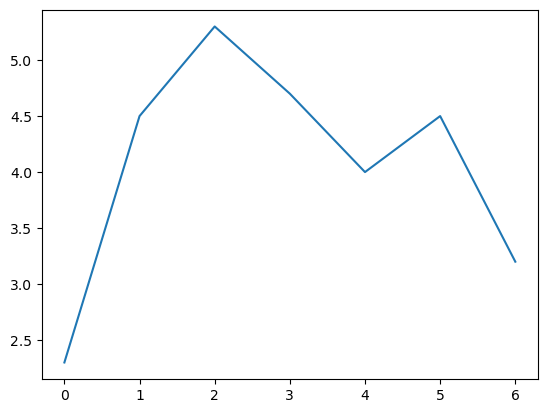

In [17]:
from matplotlib import pyplot as plt

x = [2.3, 4.5, 5.3, 4.7, 4.0, 4.5, 3.2]
plt.plot(x);
#plt.show()

### Plot annotation

In this section we will show you only the most common methods to plot and to annotate a plot (an implicit pyplot interface - more on this [link](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot)). In the next section we will provide more complex example using explicit "Axes" interface. See this [link](https://matplotlib.org/stable/users/explain/api_interfaces.html) for more information on available interfaces in `matplotlib`.

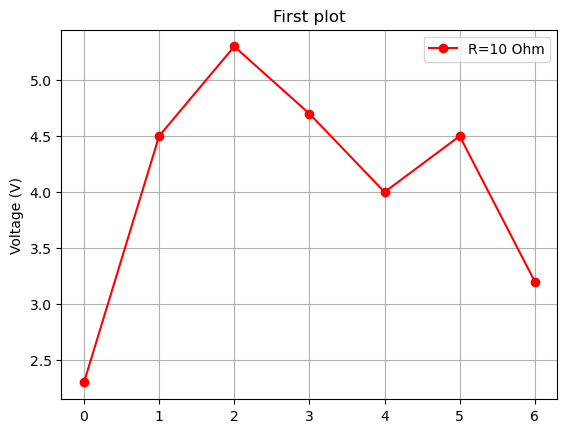

In [18]:
# Let's make it more appealing
from matplotlib import pyplot as plt

y = [2.3, 4.5, 5.3, 4.7, 4.0, 4.5, 3.2]
x = range(len(y))
plt.plot(x, y, marker='o', color='red', label="R=10 Ohm") # Function plot() 
plt.title("First plot")                                   # A title on top
plt.ylabel("Voltage (V)")                                 # A label along Y
plt.grid()                                                # Overlay grid lines
plt.legend()
plt.show()

##### Note:
* X values are optional and set to ``range(len(y)`` by default 
* X and Y are sequences

### Multiple data sets in one ``plot()`` function


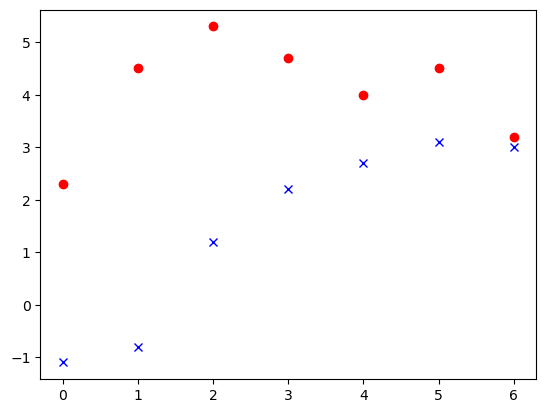

In [19]:
y1 = [2.3, 4.5, 5.3, 4.7, 4.0, 4.5, 3.2]
y2 = [-1.1, -0.8, 1.2, 2.2, 2.7, 3.1, 3.0]
x = range(len(y1))
plt.plot(x, y1, 'ro', x, y2, 'bx')    # but splitting up in 2 is better
plt.show()

In [20]:
plt.plot?

Documentation about function ``plot()`` can be found in:<br>
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html">https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html</a>

##### or use ``plt.plot?``

## 'Axes' interface in matplotlib

### Strategy

* For fast and easy plot results, use the **pyplot** module as we demonstrated in previous cells.
* As soon as you are dealing with more complex plots (subplots, interactive plots, animation etc.) or with fine tuning of a figure, then use 'Axes' interface (object-oriented approach).
* To start writing code for a plot, always first look at the gallery with plots on: https://matplotlib.org/stable/gallery/index.html and use an example as a base to start to develop your plot.

This figure will be generated using real quasar data. You can read data using `numpy`, but I like it better to use `pandas` for its nice table presentation in notebooks and cool functionality for working with table data.

In [21]:
import pandas as pd

In [24]:
popxA = pd.read_csv("data/popxA.csv")
popA = pd.read_csv("data/popA.csv")
popB = pd.read_csv("data/popB.csv")

In [25]:
popA

,LBHB,FWHM_BHB,EW_BHB,LBHA,FWHM_BHA,EW_BHA,LOIII5007,EW_OIII5007,FWHM_OIII5007,LNHA,...,EW_SII6716,LSII6731,EW_SII6731,LOI6300,EW_OI6300,LNHB,EW_NHB,LFEII4570,L5100,RFeII
0,41.155576,579.067842,66.845149,41.874971,3020.357564,585.470665,41.439338,134.869021,674.414207,40.745357,...,51.254438,40.677562,38.630100,40.519141,23.953821,40.463858,13.562255,40.402768,43.083424,0.157660
1,41.017068,735.198704,99.711049,41.645535,735.198704,705.861686,41.019953,105.532943,201.796066,41.014541,...,10.485312,39.636600,7.219127,39.547321,5.253102,40.093129,11.875006,40.306856,42.738744,0.174521
2,40.554445,598.103488,33.928396,41.501015,1625.821814,397.579496,40.933038,83.024474,200.380242,41.065909,...,32.864720,40.380460,30.890283,40.558605,43.412987,40.404841,24.028309,40.273280,42.779587,0.498214
3,40.578172,740.296574,47.445070,41.105639,740.296574,221.473981,40.848813,91.036511,293.669531,39.918451,...,5.284592,39.534557,6.129504,39.692360,8.152762,38.490907,0.388084,40.396369,42.632477,0.618822
4,40.914587,546.297232,27.086475,41.788304,1904.944969,185.552523,41.364756,74.984540,381.333850,41.632380,...,27.542126,40.859275,21.887733,40.439129,8.302478,40.692128,16.226558,40.667398,43.240846,0.594880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,42.213820,3963.897305,41.520072,42.815845,3963.897305,172.252298,42.377534,60.748185,419.164937,42.016953,...,5.842407,41.272371,4.942146,40.962627,2.403184,41.260396,4.622048,42.152296,44.300610,0.861130
3386,41.246483,3863.777393,31.498807,41.871877,3863.777393,211.470652,41.624987,78.642163,341.233830,41.345086,...,21.033095,40.854100,21.101917,40.384762,6.454792,40.608154,7.236192,41.226728,43.518344,0.866267
3387,42.296402,3859.362876,38.743796,42.861562,4212.000085,237.098501,42.065700,23.948423,646.000013,41.952057,...,6.945025,41.309644,6.919826,41.026769,3.235936,41.248248,3.467756,42.298319,44.380589,0.900135
3388,42.072676,3943.847322,50.544819,42.631103,2584.000052,204.028234,41.325289,9.193051,405.168665,41.332113,...,1.772041,40.568015,1.771395,40.032771,0.510900,40.541793,1.488655,42.046059,44.064986,0.907894


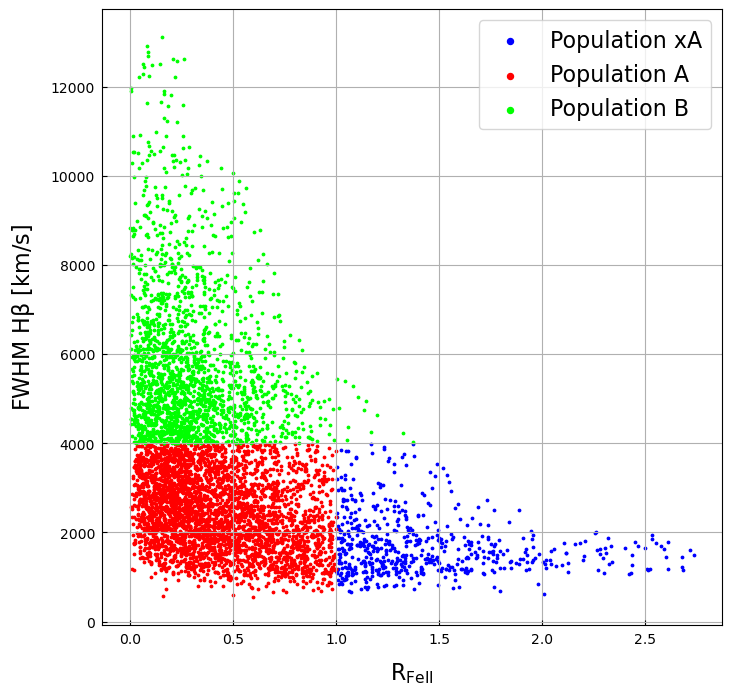

In [35]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(popxA['RFeII'], popxA['FWHM_BHB'], s=3, c='b', label = 'Population xA')
ax.scatter(popA['RFeII'], popA['FWHM_BHB'], s=3, c='r', label = 'Population A')
ax.scatter(popB['RFeII'], popB['FWHM_BHB'], s=3, c='lime', label = 'Population B')

ax.set_xlabel('$\mathrm{R_{FeII}}$', fontsize=16, labelpad=10)
ax.set_ylabel('$\mathrm{FWHM\ H\u03B2\ [km/s]}$', fontsize = 16, labelpad=10)
#ax.set_xlim(-1,10)
#ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
#ax.yaxis.set_major_locator(plt.MultipleLocator(2))
plt.grid(True)
ax.tick_params(direction='in', pad = 5)

# produce a legend with the unique colors from the scatter
plt.legend(markerscale=2.5, fontsize = 16)

plt.show()

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [36]:
fig.savefig("filename.png")

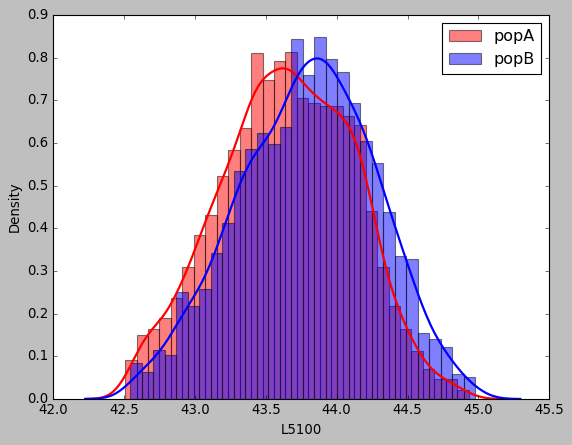

In [37]:
# Cool looking histogram with matplotlib and seaborn styles:

import seaborn as sns

plt.style.use('classic') # see all available styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
ax = plt.subplot()
y1 = popA['L5100']
y2 = popB['L5100']
ax.hist(y1, bins=30, alpha=0.5, color='red', histtype='bar', density=True, label='popA')
ax.hist(y2, bins=30, alpha=0.5, color='blue', histtype='bar', density=True, label='popB')
sns.kdeplot(y1,linewidth=2, color='red')
sns.kdeplot(y2,linewidth=2, color='blue')
ax.legend();